
# Tarea - Asignacion 4: procesamiento de imágenes y convolución - presentado por: Juan Sebastian Peñaloza - 1925146 - penaloza.juan@correounivalle.edu.co
---
## **1. Configuración Inicial**
Importamos las librerías necesarias y cargamos la imagen en escala de grises:
numpy y matplotlib sirven para manejar matrices y visualizar imágenes, respectivamente.
se usa openCV para cargar la imagen y convertirla a escala de grises, pero no se usan metodos de la libreria para realizar las transformaciones.

---


In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Histograma de la imagen de gokú calvo
La larga cabellera es un símbolo de sabiduría y poder en muchas culturas, y en el caso de Gokú lo es aún más. 
En esta obra de arte meta-modernista vemos un Gokú reinventado, en una versión que desafía las convenciones estéticas del anime tradicional. 
Su cabello, o más bien lo que queda de él, es un homenaje a la persistencia de la vida en los lugares más inhóspitos, como un jardín que lucha por florecer en un desierto postapocalíptico.
Cada vello emergiendo de su cuero cabelludo es un símbolo de resistencia, un recordatorio de que incluso los guerreros más poderosos no pueden escapar del inexorable paso del tiempo... ni de la genética.

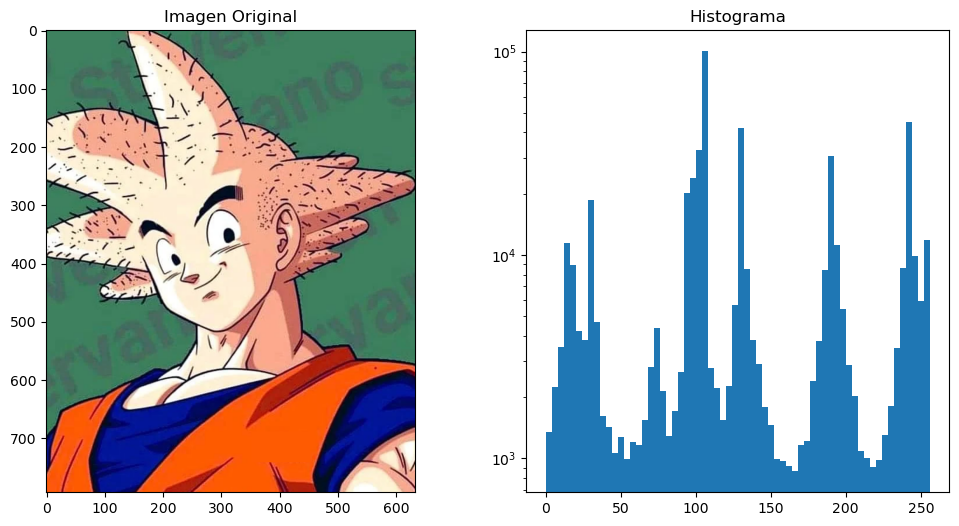

In [42]:
# Cargar imagen y convertir a escala de grises
img = cv2.imread('input.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)  # Uso float32 para evitar problemas con la resta

# Mostrar image
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Imagen Original')
plt.subplot(122), plt.hist(gray.ravel(), 64, [0,256], log='True'), plt.title('Histograma')
plt.show()


## La transformacion de suma y resta son evaluadas frecuentemente. Por eso voy a implementar otras transformaciones aritmeticas posibles: brillo y contraste.
---
Para la transformacion de brillo se convierte cada pixel de la imagen a un valor entero de 8 bits, se le suma un valor constante y se vuelve a convertir a un valor de 8 bits.
Esta constante es un numero entero que se le suma a cada pixel de la imagen, si la suma de un pixel con la constante es mayor a 255, se le asigna el valor 255, si es menor a 0, se le asigna el valor 0.

$$ h(m,n) = f(m,n) + B $$

```python
brightness = 50
brightened = np.clip(gray + brightness, 0, 255).astype(np.uint8)
```


c:\Users\quint.LAPTOP-LGVR2QRN\anaconda3\envs\platzienv\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


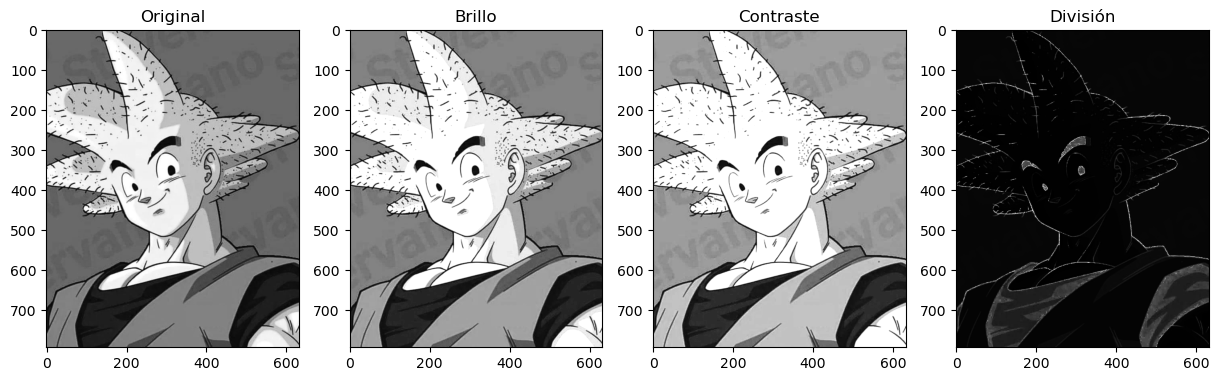

In [43]:


# División (usando una máscara)
mask = np.ones_like(gray) * 1000  

brightness = 50
contrast = 1.5

# Brillo
brightened = np.clip(gray + brightness, 0, 255).astype(np.uint8)

# Contraste
contrasted = np.clip(gray * contrast, 0, 255).astype(np.uint8)

# División (ejemplo adicional)
divided = np.clip(mask / gray, 0, 255).astype(np.uint8)

plt.figure(figsize=(15,5))
plt.subplot(141), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(142), plt.imshow(brightened, cmap='gray'), plt.title('Brillo')
plt.subplot(143), plt.imshow(contrasted, cmap='gray'), plt.title('Contraste')
plt.subplot(144), plt.imshow(divided, cmap='gray'), plt.title('División')
plt.show()


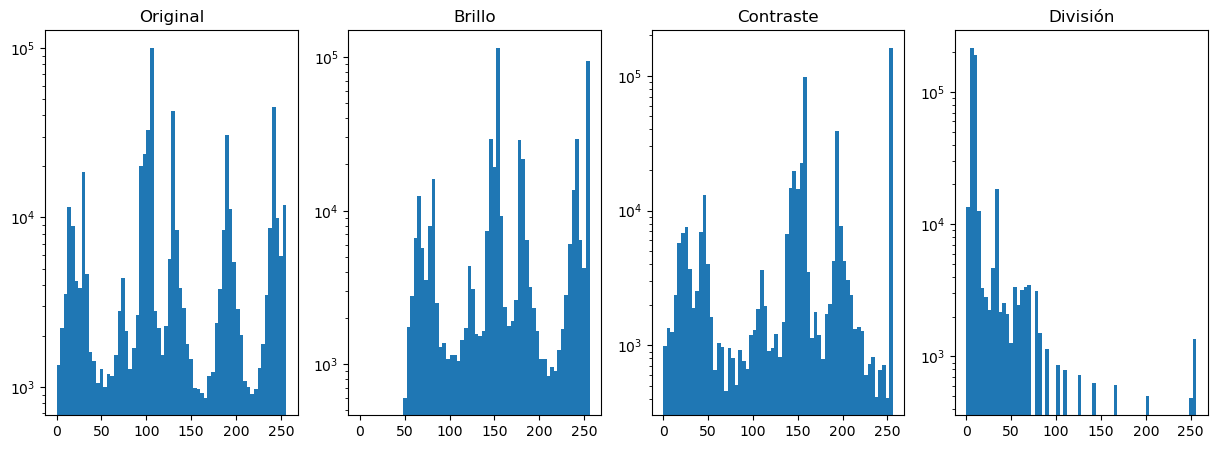

In [44]:
# grafica de histogramas de cada una de las cuatro operaciones
plt.figure(figsize=(15,5))
plt.subplot(141), plt.hist(gray.ravel(), 64, [0,256], log='True'), plt.title('Original')
plt.subplot(142), plt.hist(brightened.ravel(), 64, [0,256], log='True'), plt.title('Brillo')
plt.subplot(143), plt.hist(contrasted.ravel(), 64, [0,256], log='True'), plt.title('Contraste')
plt.subplot(144), plt.hist(divided.ravel(), 64, [0,256], log='True'), plt.title('División')
plt.show()

## Negativo de una imagen
El negativo de una imagen se obtiene restando el valor de cada pixel a 255, es decir, si un pixel tiene un valor de 100, en el negativo tendra un valor de 155.
$$ h(m,n) = 255 - f(m,n) $$
$$ T(i) = 255 - i $$


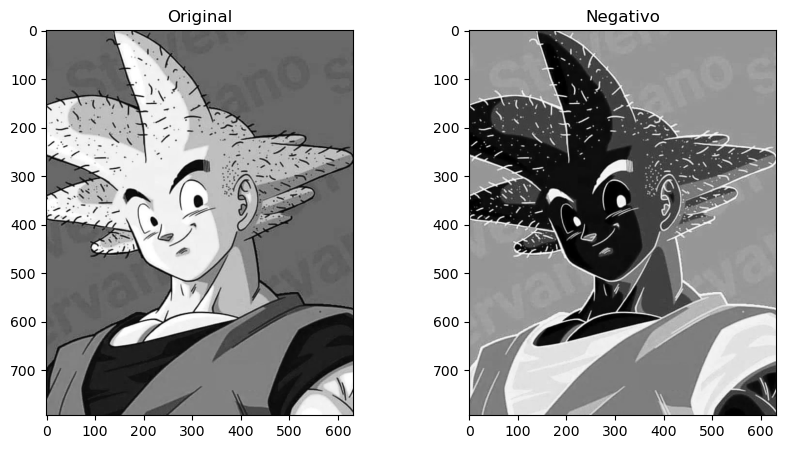

In [45]:
# Imagen Negativa

negative = 255 - gray
negative = np.clip(negative, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(negative, cmap='gray'), plt.title('Negativo')
plt.show()


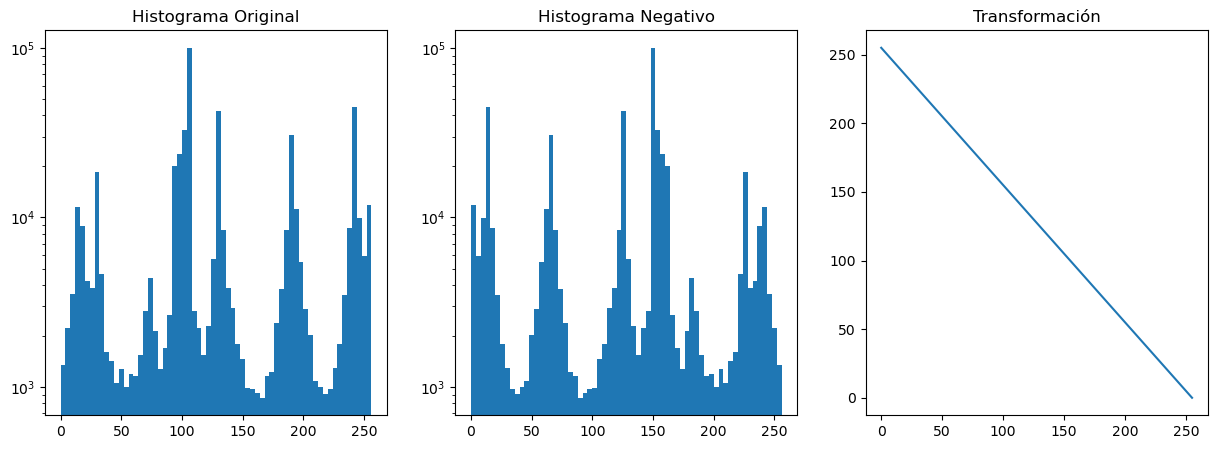

In [46]:
# histograma y grafica de la transformacion
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Original')
plt.subplot(132), plt.hist(negative.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Negativo')
plt.subplot(133), plt.plot(np.arange(256), np.arange(256)[::-1]), plt.title('Transformación')
plt.show()


## Corrección Gamma
La corrección gamma es una transformación no lineal que se aplica a las imágenes digitales para corregir la luminancia de la imagen.

$$ h(m,n) = f(m,n)^\gamma $$


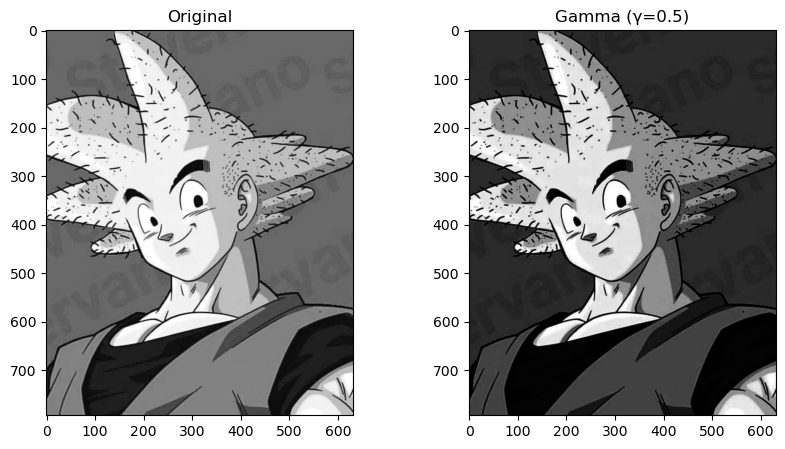

In [47]:



# h(m,n) = 255 * (f(m,n)/255)^{1/γ}
def gamma_correction(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    return (image / 255.0)**inv_gamma * 255.0

gamma = 0.5
gamma_corrected = gamma_correction(gray, gamma).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(gamma_corrected, cmap='gray'), plt.title('Gamma (γ=0.5)')
plt.show()



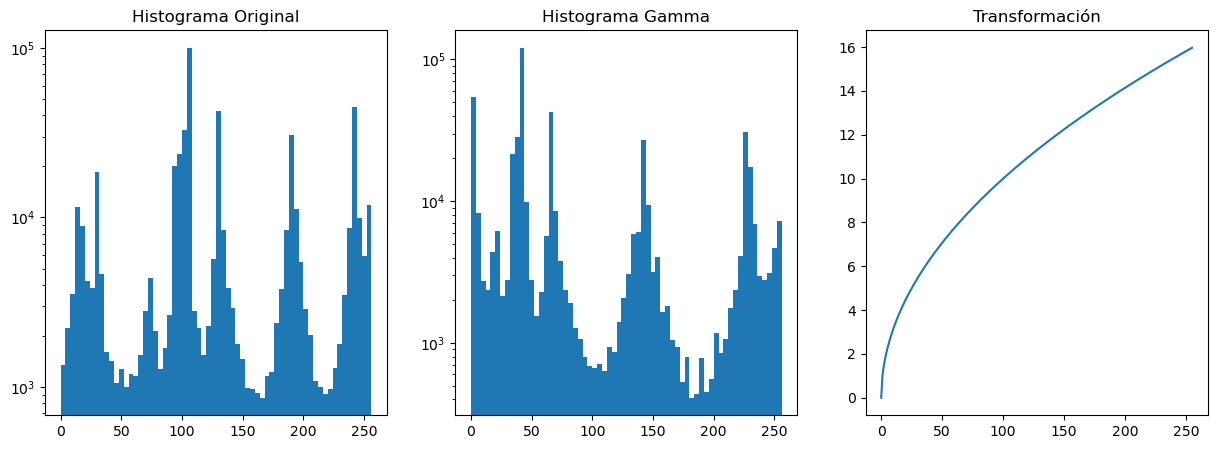

In [51]:
# histograma y grafica de la transformacion
plt.figure(figsize=(15,5))
plt.subplot(131), plt.hist(gray.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Original')
plt.subplot(132), plt.hist(gamma_corrected.ravel(), 64, [0,256], density=False, histtype='bar', log='True'), plt.title('Histograma Gamma')
plt.subplot(133), plt.plot(np.arange(256), np.arange(256)**gamma), plt.title('Transformación')
plt.show()


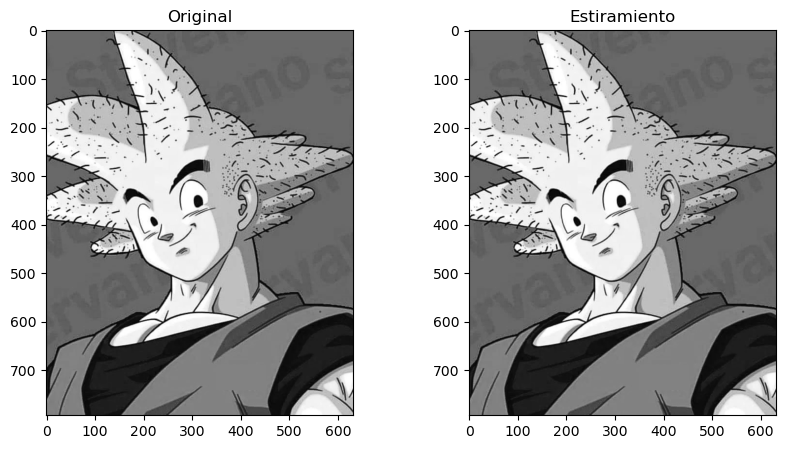

In [ ]:

min_val = gray.min()
max_val = gray.max()
stretched = ((gray - min_val) * (255/(max_val - min_val))).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(stretched, cmap='gray'), plt.title('Estiramiento')
plt.show()


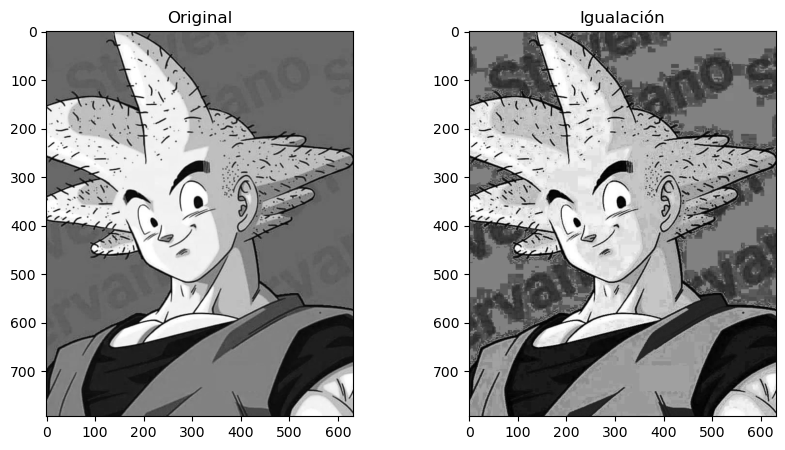

In [49]:
# 5. Igualación de Histograma
# h(m,n) = T(r_k) donde T(r) = (L-1) * S(r)
# (Usamos OpenCV para implementar esta compleja operación)
equalized = cv2.equalizeHist(gray.astype(np.uint8))

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(equalized, cmap='gray'), plt.title('Igualación')
plt.show()


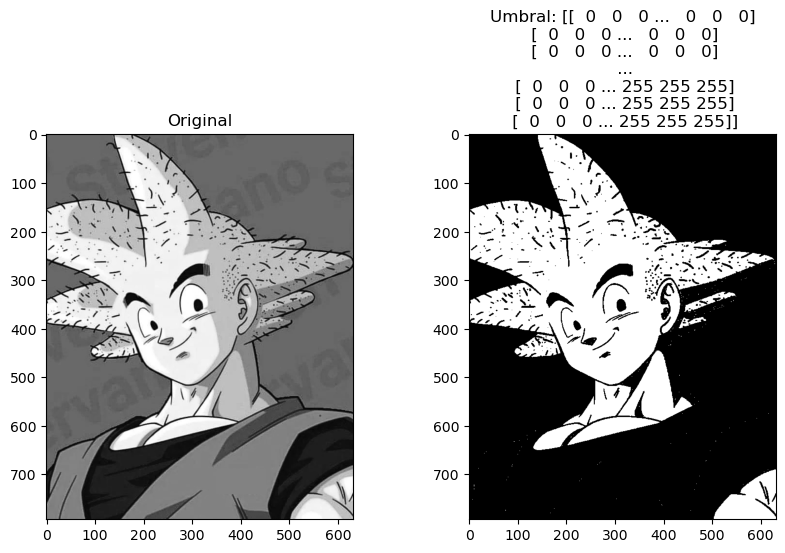

In [50]:
# 6. Umbralización
# ---------------------
# h(m,n) = { 0 si f(m,n) < T; 255 si f(m,n) >= T }
# Usando método Otsu para T automático
_, thresh = cv2.threshold(gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(gray, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(thresh, cmap='gray'), plt.title(f'Umbral: {thresh}')
plt.show()